In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as st


# File to Load (Remember to Change These)
file_to_load = "archive/googleplaystore.csv"

# Read Google Play Store File and store into Pandas data frame
google_playstore = pd.read_csv(file_to_load)
google_playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
# Looking for all available categories in my DF
google_playstore["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [3]:
# Selecting only the Games from my Google App List
google_playstore_games = google_playstore.loc[google_playstore["Category"]=="GAME",:]
google_playstore_games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up


In [4]:
# Columns Names
google_playstore_games.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# Counting my data for cleaning
google_playstore_games.count()

App               1144
Category          1144
Rating            1097
Reviews           1144
Size              1144
Installs          1144
Type              1144
Price             1144
Content Rating    1144
Genres            1144
Last Updated      1144
Current Ver       1144
Android Ver       1144
dtype: int64

In [6]:
# Dropping rows with missing information
google_playstore_games = google_playstore_games.dropna(how="any")
google_playstore_games 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up


In [7]:
google_playstore_games["Genres"].unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [8]:
google_playstore_games["Genres"] = google_playstore_games["Genres"].replace({"Action":"Action & Adventure",
                                                                            "Adventure":"Action & Adventure",
                                                                            "Adventure;Action & Adventure": "Action & Adventure",
                                                                            "Action;Action & Adventure":"Action & Adventure"})
google_playstore_games

<ipython-input-8-53406f1b3493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_playstore_games["Genres"] = google_playstore_games["Genres"].replace({"Action":"Action & Adventure",


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action & Adventure,"August 7, 2018",1.5.447,4.0 and up


In [9]:
# Converting the string form of installs into interger
google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace('+', '')
google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace(',', '')
google_playstore_games["Installs"] = google_playstore_games["Installs"].astype(int)
google_playstore_games

<ipython-input-9-922ec58db0c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace('+', '')
<ipython-input-9-922ec58db0c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_playstore_games["Installs"] = google_playstore_games["Installs"].str.replace(',', '')
<ipython-input-9-922ec58db0c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,50000,Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,1000000,Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510,78M,500000,Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1000000,Free,0,Teen,Action & Adventure,"August 7, 2018",1.5.447,4.0 and up


In [10]:
# Looking for the most installed games
google_playstore_games=google_playstore_games.sort_values(by=["Installs"], ascending = False)
google_playstore_games=google_playstore_games.drop_duplicates(subset=["App"])

# Top 100 Games Analysis and Visualization

                            Google Store Data

In [20]:
path_figures = "car_part_figs/"

In [21]:
#Getting the top 100 games using iloc, after the google_playstore_games was sorted by installs
hundred_games_df = google_playstore_games.iloc[0:100,:]
hundred_games_df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1750,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1886,Temple Run 2,GAME,4.3,8119151,62M,500000000,Free,0,Everyone,Action & Adventure,"July 5, 2018",1.49.1,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1885,Pou,GAME,4.3,10486018,24M,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
4227,slither.io,GAME,4.4,5231553,Varies with device,100000000,Free,0,Everyone,Action & Adventure,"November 14, 2017",Varies with device,2.3 and up
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99M,100000000,Free,0,Teen,Action & Adventure,"July 24, 2018",1.2.97.3042,4.0.3 and up
1932,Shadow Fight 2,GAME,4.6,10979062,88M,100000000,Free,0,Everyone 10+,Action & Adventure,"July 2, 2018",1.9.38,3.0 and up
4188,Geometry Dash Lite,GAME,4.5,6181640,58M,100000000,Free,0,Everyone,Arcade,"December 22, 2017",2.2,4.0 and up
4182,Helix Jump,GAME,4.2,1485806,33M,100000000,Free,0,Everyone,Action & Adventure,"April 9, 2018",1.0.6,4.1 and up


In [22]:
#For the top 100 games, we grouped by Genres to obtain the distribution by Genres of this group
hundred_games_groupby = hundred_games_df.groupby(by="Genres")
#Getting the count for each group, so we can graph it
count_genres = hundred_games_groupby["Genres"].count()
count_genres

Genres
Action & Adventure           30
Arcade                       25
Board                         2
Card                          1
Casual                        9
Casual;Action & Adventure     1
Music                         1
Puzzle                        6
Racing                       13
Role Playing                  1
Simulation                    1
Sports                        3
Strategy                      4
Trivia                        1
Word                          2
Name: Genres, dtype: int64

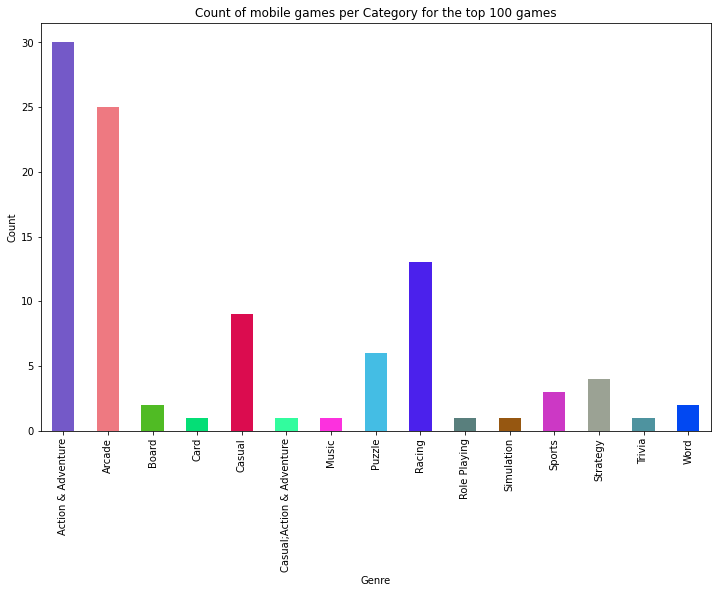

In [27]:
#Generating a color list to display our count by Genres
color_list = []
for colors in range(count_genres.count()):
    color_list.append([random.random(),random.random(),random.random()])
#Plotting the count_genres information
count_genres.plot(kind="bar",color=color_list,figsize=(12,7.5),title="Count of mobile games per Category for the top 100 games")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.savefig(path_figures+"count_category_100games_bar.png",bbox_inches='tight')

We can observe that the top groups, for the top 100 games are: Action & Adventure, Arcade, Racing and Casual.

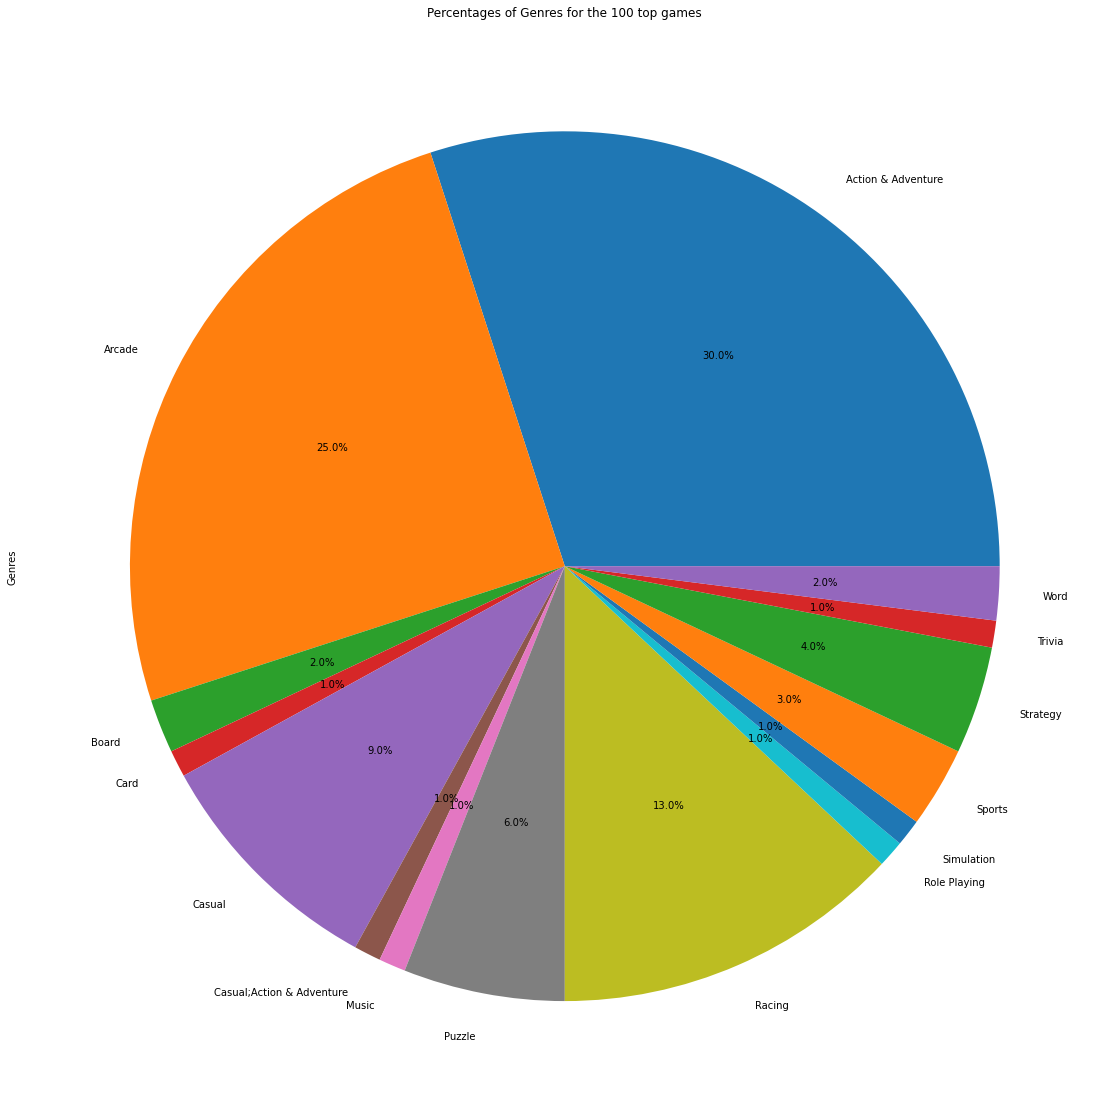

In [29]:
#Generating a pie plot for the same cause
count_genres.plot(kind="pie",figsize=(25,20),autopct='%1.1f%%',title="Percentages of Genres for the 100 top games")
plt.savefig(path_figures+"count_category_100games_pie.png",bbox_inches='tight')

In [30]:
#defining another dataframe and a groupby object, by genre. Then we get for every group, the sum of its installs
installs_info = hundred_games_df
installs_groupby = installs_info.groupby(by="Genres")
sum_installs = installs_groupby["Installs"].sum()
sum_installs

Genres
Action & Adventure           2.700000e+09
Arcade                       3.150000e+09
Board                        1.000000e+08
Card                         5.000000e+07
Casual                       2.050000e+09
Casual;Action & Adventure    1.000000e+08
Music                        5.000000e+07
Puzzle                       4.500000e+08
Racing                       1.000000e+09
Role Playing                 5.000000e+07
Simulation                   5.000000e+07
Sports                       3.000000e+08
Strategy                     3.500000e+08
Trivia                       1.000000e+08
Word                         1.000000e+08
Name: Installs, dtype: float64

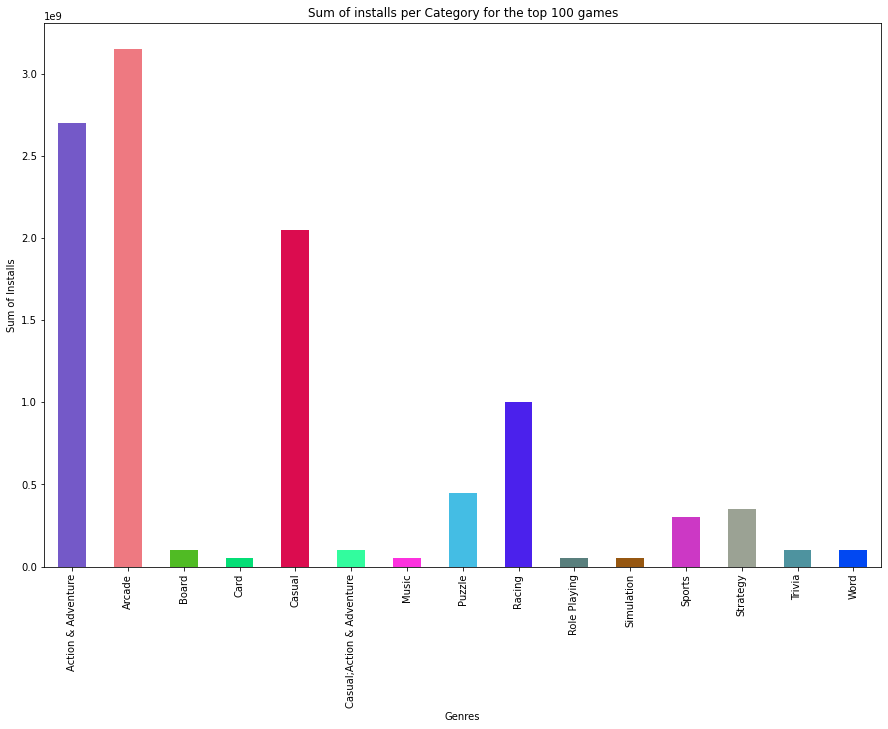

In [32]:
#Generating a plot for the sums of installs per category
sum_installs.plot(kind="bar",color=color_list,figsize=(15,10),title="Sum of installs per Category for the top 100 games")
plt.ylabel("Sum of Installs")
plt.savefig(path_figures+"sum_category_100games_bar.png",bbox_inches='tight')

As we can see, the same 4 genres stand on top of the sum of installs, however we see a variation between the highest bars, in the Count per genre plot, the top bar is Action & Adventure. Here, it is arcade

0.9361695321097592


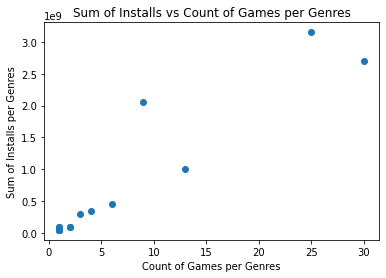

In [33]:
#We wanted to get the correlation between the Count per Genres and the Sum of Installs per genre
plt.scatter(count_genres,sum_installs)
plt.xlabel("Count of Games per Genres")
plt.ylabel("Sum of Installs per Genres")
plt.title("Sum of Installs vs Count of Games per Genres")
correlation_count_sum = st.pearsonr(count_genres,sum_installs)[0]
print(correlation_count_sum)
plt.savefig(path_figures+"correlation_count_sum_genre.png",bbox_inches='tight')

There is a clear relationship between Sum of Installs per Genre and the Count of Games per Genre. This let us think that in our group, the more games a genre has, the more Installs it will have, meaning that the installs distribution is homogeneous.

In [34]:
#Revising the type values existing 
hundred_games_df["Type"].unique()

array(['Free'], dtype=object)

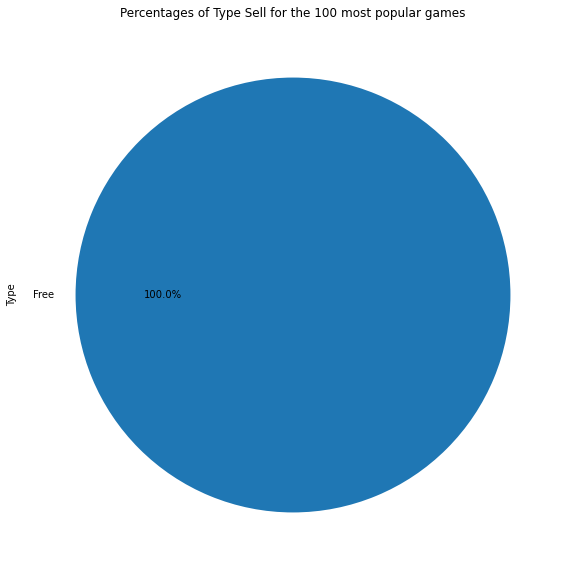

In [35]:
#Grouping by Type and and counting the values per Type
type_sell_groupby = hundred_games_df.groupby(by="Type")
type_sell_count = type_sell_groupby["Type"].count()
type_sell_count.plot(kind="pie",figsize=(20,10),autopct='%1.1f%%',title="Percentages of Type Sell for the 100 most popular games")
plt.savefig(path_figures+"count_type_pie.png",bbox_inches='tight')

As can be seen, the 100% of the top games on Apple Store are free. Meaning that the the free games (and obviously good), are the ones that will be downloaded the most.

In [36]:
#We grouped by Content Rating to know what content type is the most used in the top 100 games
content_rating_groupby = hundred_games_df.groupby(by="Content Rating")
content_rating_count = content_rating_groupby["Content Rating"].count()
content_rating_count

Content Rating
Everyone        63
Everyone 10+    16
Mature 17+       3
Teen            18
Name: Content Rating, dtype: int64

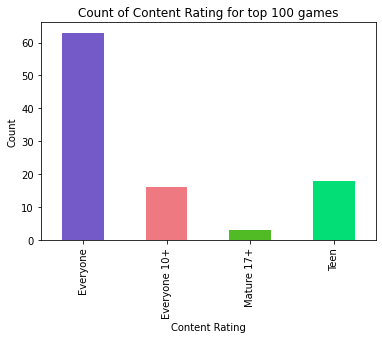

In [38]:
#Generating a plot for the count of Content rating for top 100 games.
content_rating_count.plot(kind="bar",color=color_list)
plt.ylabel("Count")
plt.title("Count of Content Rating for top 100 games")
plt.savefig(path_figures+"count_content_bar.png",bbox_inches='tight')

The most common content rating for the top 100 games are Everyone and Everyone10+, this showcases that the people prefer the non-violent games and dont like more adult oriented contents.

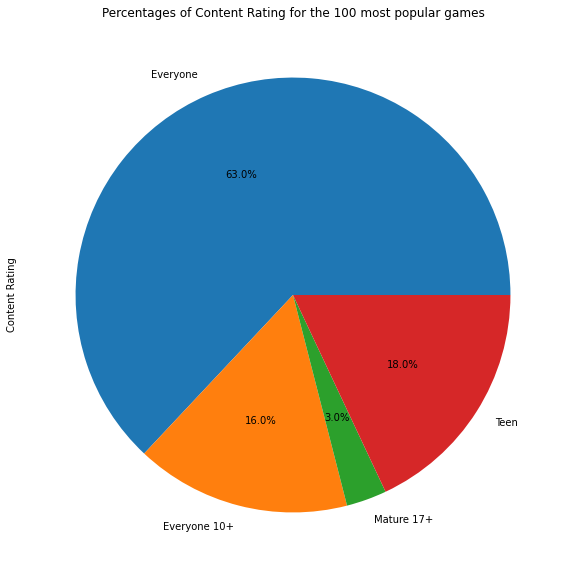

In [39]:
#Showing the same information, but in a pie plot.
content_rating_count.plot(kind="pie",figsize=(20,10),autopct='%1.1f%%',title="Percentages of Content Rating for the 100 most popular games")
plt.savefig(path_figures+"count_content_pie.png",bbox_inches='tight')

In [40]:
#Obtaining the installs per Content Rating group
installs_percontent_groupby = hundred_games_df.groupby(by="Content Rating")
installs_percontent = installs_percontent_groupby["Installs"].sum()
installs_percontent

Content Rating
Everyone        6.950000e+09
Everyone 10+    2.250000e+09
Mature 17+      2.500000e+08
Teen            1.150000e+09
Name: Installs, dtype: float64

0.98319843866457


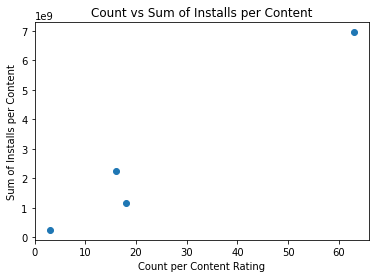

In [43]:
#Generating a Scatter Plot from Count of Content vs Sum of Installs
plt.scatter(content_rating_count,installs_percontent)
plt.xlabel("Count per Content Rating")
plt.ylabel("Sum of Installs per Content")
plt.title("Count vs Sum of Installs per Content")
correlation_cont_installs = st.pearsonr(content_rating_count,installs_percontent)[0]
print(correlation_cont_installs)
plt.savefig(path_figures+"correlation_count_sum_content.png",bbox_inches='tight')

There is a clear relationship between Sum of Installs per Content Rating and the Count of Games per Content Rating. This let us think that in our group, the more games a content rating has, the more Installs it will have, meaning that the installs distribution is homogeneous.

0.02002851799735234


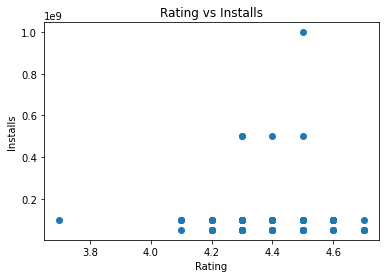

In [47]:
#Looking for correlation between Content Rating and Sum of Installs
plt.scatter(hundred_games_df["Rating"],hundred_games_df["Installs"])
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating vs Installs")
print(st.pearsonr(hundred_games_df["Rating"],hundred_games_df["Installs"])[0])
plt.savefig(path_figures+"correlation_rating_installs.png",bbox_inches='tight')

It does not seem that there is a clear correlation between the Rating and the number of installs. The correlation coefficient is 0.02

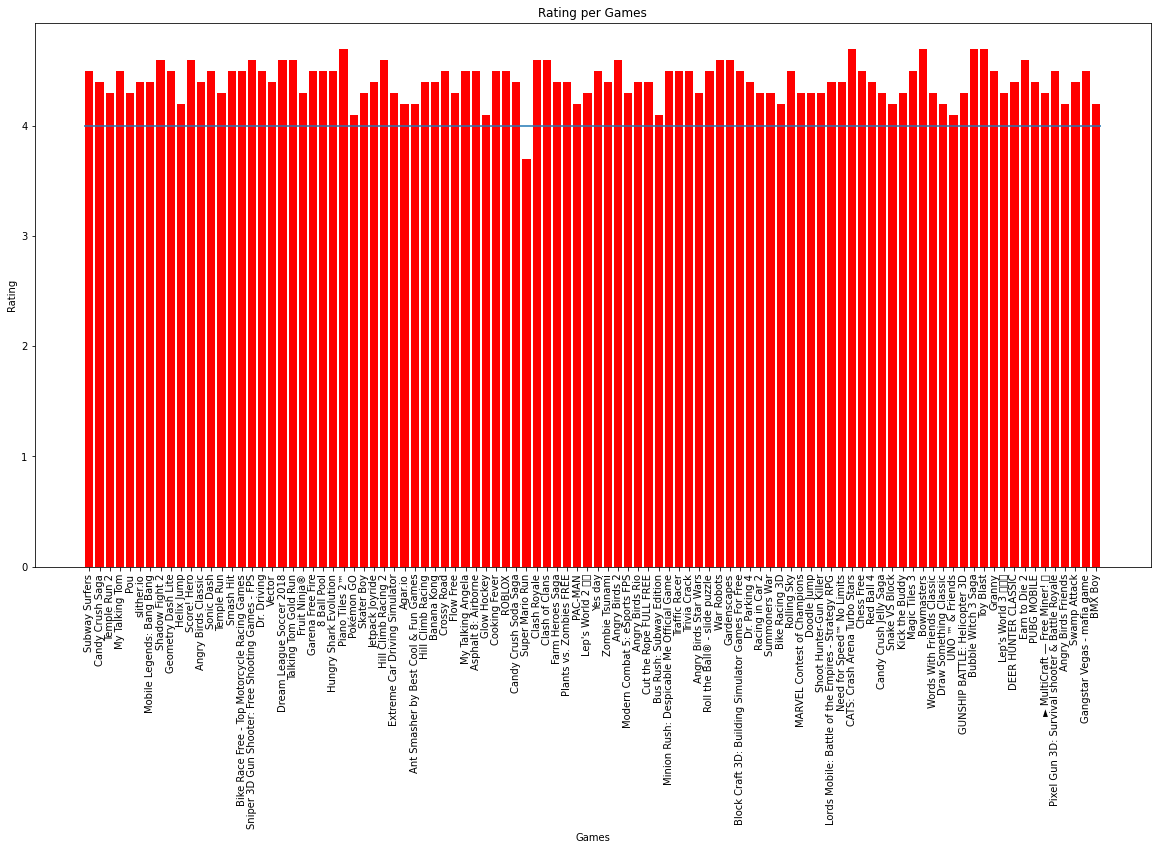

In [53]:
#Noticing that the great majority of the games, are over the 4.0 rating line
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.hlines(4,-0.5,99.5)
plt.bar(hundred_games_df["App"],hundred_games_df["Rating"],color='r')
plt.xlabel("Games")
plt.ylabel("Rating")
plt.title("Rating per Games")
plt.savefig(path_figures+"rating_pergame.png",bbox_inches='tight')

As you can see, most of the games are between 4.0 and 5.0 rating.

                            Apple Store Data

In [56]:
#Importing the Apple Store CSV
path = "C:/Users/empha/Desktop/Data_Analytics/Semana_7/project/AppleStore.csv"
apple_data_df = pd.read_csv(path)
apple_data_df = apple_data_df.loc[apple_data_df["prime_genre"]=="Games",:]

In [58]:
#Ordered the created dataframe by the rating_count_tot column and selected top 100 records
apple_hundred_df = apple_data_df.sort_values(by="rating_count_tot",ascending=False)
apple_hundred_df = apple_hundred_df.iloc[0:100,:]
#Separating between entre free y  paid
free_games = apple_hundred_df.loc[apple_data_df["price"]==0,:]

paid_games = apple_hundred_df.loc[apple_data_df["price"]!=0,:]
apple_hundred_df.head(20)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1346,1561,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
707,810,420009108,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
1493,1731,553834731,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
275,310,343200656,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1
1246,1450,512939461,Subway Surfers,156038144,USD,0.00,706110,97,4.5,4.0,1.72.1,9+,Games,38,5,1,1
348,393,362949845,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
343,386,359917414,Solitaire,101943296,USD,0.00,679055,9673,4.5,4.5,4.11.2,4+,Games,38,4,11,1
990,1143,469369175,CSR Racing,524803072,USD,0.00,677247,2029,4.5,4.5,4.0.1,4+,Games,37,5,10,1
3042,3637,924373886,Crossy Road - Endless Arcade Hopper,165471232,USD,0.00,669079,1087,4.5,4.5,1.5.4,9+,Games,38,5,13,1
1634,1895,575658129,Injustice: Gods Among Us,1829599232,USD,0.00,612532,410,4.5,4.5,2.15.1,12+,Games,39,5,13,1


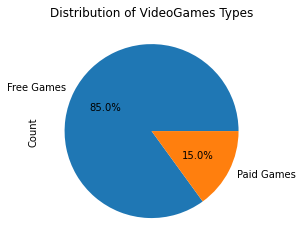

In [59]:
#Generating a pie plot from the paid and free categories
plt.pie(x=[len(free_games),len(paid_games)],autopct='%1.1f%%',labels=["Free Games","Paid Games"])
plt.title("Distribution of VideoGames Types")
plt.ylabel("Count")
plt.savefig(path_figures+"videogame_types_pie.png",bbox_inches='tight')

Observing the previous plot, and contrary from Google Data, 15% of the top games are paid.

In [60]:
average_price = apple_hundred_df["price"].mean()
print("The average price that the people are willing to pay, considering the free ones, are: "+str(average_price))

The average price that the people are willing to pay, considering the free ones, are: 0.2584999999999999


In [62]:
max_price = apple_hundred_df["price"].max()
print("The most expensive app is: "+str(max_price))


The most expensive app is: 6.99


In [64]:
count_less = apple_hundred_df.loc[apple_hundred_df["price"]<average_price,:]
print("There are "+str(len(count_less))+" games that are free")

There are 85 games that are free


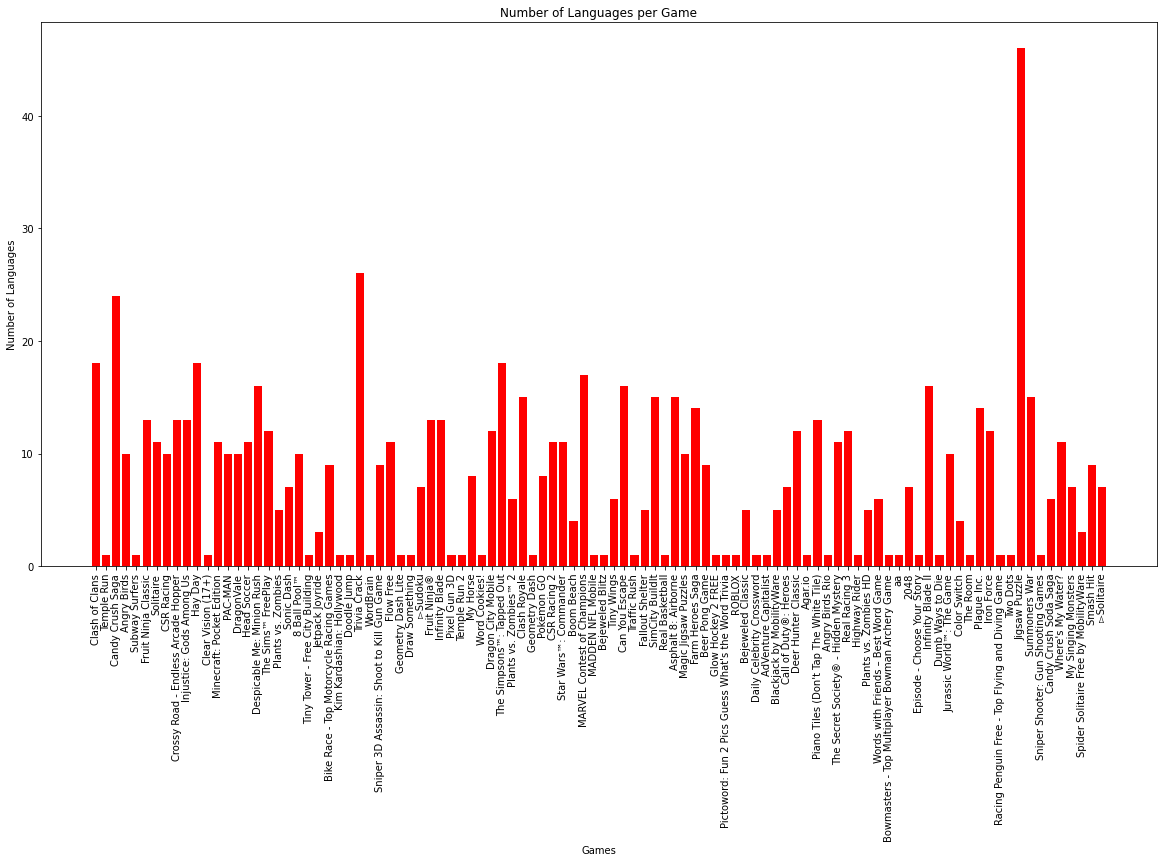

In [66]:
#Plotting Language number per countries
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.bar(apple_hundred_df["track_name"],apple_hundred_df["lang.num"],color='r')
plt.xlabel("Games")
plt.ylabel("Number of Languages")
plt.title("Number of Languages per Game")
plt.savefig(path_figures+"lang_pergame.png",bbox_inches='tight')

In [67]:
print("The average languages for the app is: "+str(apple_hundred_df["lang.num"].mean()))

The average languages for the app is: 7.89


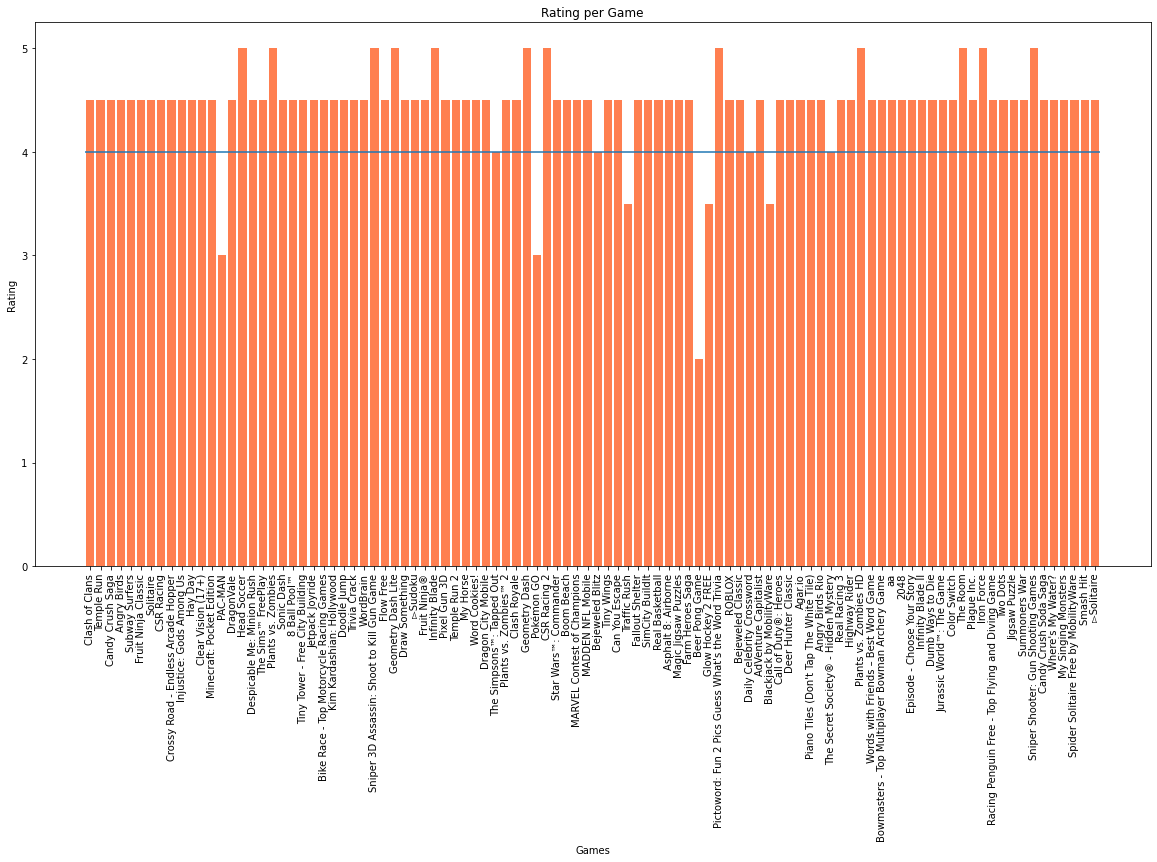

In [70]:
#Plotting the rating per game
plt.figure(figsize=(20,10))
plt.xticks(rotation="vertical")
plt.bar(apple_hundred_df["track_name"],apple_hundred_df["user_rating"],color='coral')
plt.hlines(4,-.5,99.5)
plt.xlabel("Games")
plt.ylabel("Rating")
plt.title("Rating per Game")
plt.savefig(path_figures+"rating_pergame_apple.png",bbox_inches='tight')

As can be seen in the previous figure, almost all the games in our top 100 of Apple Games, are above the 4.0 Rating.

In [71]:
print("The user rating mean is: " +str(apple_hundred_df["user_rating"].mean()))

The user rating mean is: 4.455


0.040552720541389996


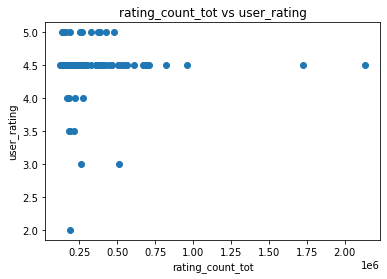

In [72]:
#Finding a correlation between the rating count total and the user rating
plt.scatter(apple_hundred_df["rating_count_tot"],apple_hundred_df["user_rating"])
print(st.pearsonr(apple_hundred_df["rating_count_tot"],apple_hundred_df["user_rating"])[0])
plt.title("rating_count_tot vs user_rating")
plt.xlabel("rating_count_tot")
plt.ylabel("user_rating")
plt.savefig(path_figures+"correlation_rct_userrat.png",bbox_inches='tight')

It seems that rating_count_tot and user_rating are not totally related.

0.15937969451635833


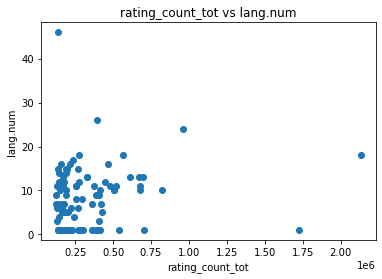

In [73]:
plt.scatter(apple_hundred_df["rating_count_tot"],apple_hundred_df["lang.num"])
print(st.pearsonr(apple_hundred_df["rating_count_tot"],apple_hundred_df["lang.num"])[0])
plt.title("rating_count_tot vs lang.num")
plt.xlabel("rating_count_tot")
plt.ylabel("lang.num")
plt.savefig(path_figures+"correlation_rct_langnum.png",bbox_inches='tight')

It seems that there is a low correlation, yet it exists. The correlation coefficient is: 0.1593